<a href="https://colab.research.google.com/github/yuki0703-sudo/Research/blob/main/%E9%96%89%E3%83%AB%E3%83%BC%E3%83%97%E7%B3%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def linestyle_generator():#グラフをプロットするときの線種を決めるジェネレータ
  linestyle=['-','--','-.',':']
  lineID=0
  while True:
    yield linestyle[lineID]
    lineID=(lineID+1)%len(linestyle)

In [ ]:
def linestyle_generator():#グラフをプロットするときの線種を決めるジェネレータ
  linestyle=['-','--','-.',':']
  lineID=0
  while True:
    yield linestyle[lineID]
    lineID=(lineID+1)%len(linestyle)

def plot_set(fig_ax,*args):#グラフを整える関数
  fig_ax.set_xlabel(args[0]) #x軸のラベルを一つ目の引数で指定
  fig_ax.set_ylabel(args[1]) #y軸のラベルを二つ目の引数で指定
  fig_ax.grid(ls=':')
  if len(args)==3:
    fig_ax.legend(loc=args[2]) #凡例の位置を３つ目の引数で指定

def bodeplot_set(fig_ax,*args): #ボード線図を整える関数
  #ゲイン線図のグリッドとy軸ラベルの設定
  fig_ax[0].grid(which='both',ls=':')
  fig_ax[0].set_ylabel('Gani[db]')
  #位相線図のグリッドとx軸，y軸ラベルの設定
  fig_ax[1].grid(which='both',ls=':')
  fig_ax[1].set_xlabel('$\omega$[rad/s]')
  fig_ax[1].set_ylabel('Phase[deg]')
  #凡例の表示
  if len(args)>0: #引数が１つ以上：ゲイン線図に表示
    fig_ax[1].legend(loc=args[0])
  if len(args)>1: #引数が２つ以上:位相線図にも表示
    fig_ax[0].legend(loc=args[1])

In [ ]:
def plot_set(fig_ax,*args):#グラフを整える関数
  fig_ax.set_xlabel(args[0]) #x軸のラベルを一つ目の引数で指定
  fig_ax.set_ylabel(args[1]) #y軸のラベルを二つ目の引数で指定
  fig_ax.grid(ls=':')
  if len(args)==3:
    fig_ax.legend(loc=args[2]) #凡例の位置を３つ目の引数で指定


In [ ]:
def bodeplot_set(fig_ax,*args): #ボード線図を整える関数
  #ゲイン線図のグリッドとy軸ラベルの設定
  fig_ax[0].grid(which='both',ls=':')
  fig_ax[0].set_ylabel('Gani[db]')
  #位相線図のグリッドとx軸，y軸ラベルの設定
  fig_ax[1].grid(which='both',ls=':')
  fig_ax[1].set_xlabel('$\omega$[rad/s]')
  fig_ax[1].set_ylabel('Phase[deg]')
  #凡例の表示
  if len(args)>0: #引数が１つ以上：ゲイン線図に表示
    fig_ax[1].legend(loc=args[0])
  if len(args)>1: #引数が２つ以上:位相線図にも表示
    fig_ax[0].legend(loc=args[1])

In [ ]:
!pip install control

     |████████████████████████████████| 357 kB 5.5 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=5bf5c88b2b2e30581f7be480deab1c828bc4f24bee108241d50d204432ebdcb2
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


In [ ]:
from control.matlab import *
g=9.81
l=0.2
M=0.5
mu=1.5e-2
J=1.0e-2

P=tf([0,1],[J,mu,M*g*l])

ref=30 #目標角度[deg]

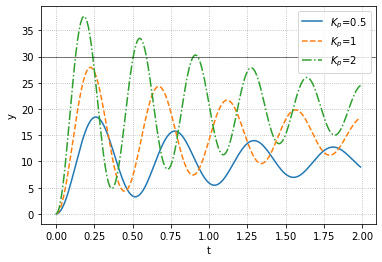

In [ ]:
#P制御
import matplotlib.pyplot as plt
import numpy as np
kp=[0.5,1,2]

LS=linestyle_generator()
fig,ax=plt.subplots()

for i in range(len(kp)):
  K=tf([0,kp[i]],[0,1]) #P制御
  Gyr=feedback(P*K,1)
  y,t=step(Gyr,np.arange(0,2,0.01))

  pltargs={'ls':next(LS),'label':'$K_p$='+str(kp[i])}
  ax.plot(t,y*ref,**pltargs)

ax.axhline(ref,color='k',linewidth=0.5)
plot_set(ax,'t','y','best')


/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)


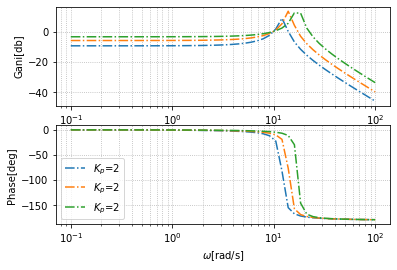

In [ ]:
LS=linestyle_generator()
fig,ax=plt.subplots(2,1)

for i in range(len(kp)):
  K=tf([0,kp[i]],[0,1])
  Gyr=feedback(P*K,1)
  gain,phase,w=bode(Gyr,logspace(-1,2),Plot=False)
  
  targs={'ls':next(LS),'label':'$K_p$='+str(kp[i])}
  ax[0].semilogx(w,20*np.log10(gain),**pltargs)
  ax[1].semilogx(w,phase*180/np.pi,**pltargs)

bodeplot_set(ax,'lower left')


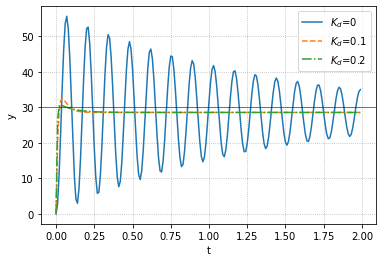

In [ ]:
#PD制御
LS=linestyle_generator()
fig,ax=plt.subplots()

kp=2
kd=[0,0.1,0.2]

for i in range(len(kd)):
  K=tf([kd[i],kp],[0.1])
  Gyr=feedback(P*K,1)
  y,t=step(Gyr,np.arange(0,2,0.01))

  pltargs={'ls':next(LS),'label':'$K_d$='+str(kd[i])}
  ax.plot(t,y*ref,**pltargs)

ax.axhline(ref,color='k',linewidth=0.5)
plot_set(ax,'t','y','best')

/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)


[-5.03203688e-04 -5.79392726e-04 -6.67119759e-04 -7.68133335e-04
 -8.84447649e-04 -1.01838324e-03 -1.17261412e-03 -1.35022240e-03
 -1.55476184e-03 -1.79033186e-03 -2.06166419e-03 -2.37422481e-03
 -2.73433448e-03 -3.14931267e-03 -3.62765081e-03 -4.17922369e-03
 -4.81555095e-03 -5.55012628e-03 -6.39883989e-03 -7.38053270e-03
 -8.51774067e-03 -9.83771951e-03 -1.13738928e-02 -1.31679537e-02
 -1.52730009e-02 -1.77583580e-02 -2.07172183e-02 -2.42792178e-02
 -2.86319968e-02 -3.40601018e-02 -4.10197265e-02 -5.02943187e-02
 -6.33547198e-02 -8.33234464e-02 -1.18174840e-01 -1.95897256e-01
 -5.17622706e-01 -2.55108182e+00 -2.93492757e+00 -3.01939058e+00
 -3.05616421e+00 -3.07693489e+00 -3.09040583e+00 -3.09991973e+00
 -3.10703211e+00 -3.11256454e+00 -3.11699237e+00 -3.12061062e+00
 -3.12361304e+00 -3.12613300e+00]
[-6.28204322 -6.28187038 -6.28167139 -6.28144232 -6.28117864 -6.28087515
 -6.28052588 -6.28012397 -6.2796616  -6.27912981 -6.27851839 -6.27781576
 -6.27700881 -6.27608284 -6.27502149 -6.

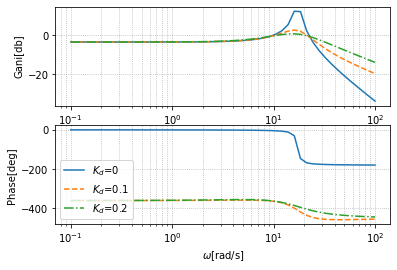

In [ ]:
LS=linestyle_generator()
fig,ax=plt.subplots(2,1)

for i in range(len(kd)):
  K=tf([kd[i],kp],[0,1])
  Gyr=feedback(P*K,1)

  gain,phase,w=bode(Gyr,logspace(-1,2),Plot=False)
  print(phase)
  pltargs={'ls':next(LS),'label':'$K_d$='+str(kd[i])}
  ax[0].semilogx(w,20*np.log10(gain),**pltargs)
  ax[1].semilogx(w,phase*180/np.pi,**pltargs)
  ## ax[1].semilogx(w,(phase+360)*180/np.pi,**pltargs)

bodeplot_set(ax,'lower left')

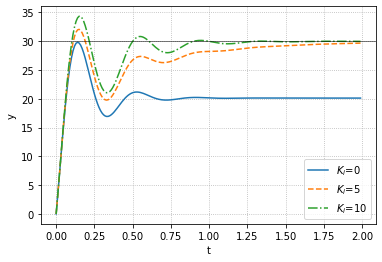

In [ ]:
#PID制御
kp=2
kd=0.1
ki=[0,5,10]

LS=linestyle_generator()
fig,ax=plt.subplots()

for i in range(len(ki)):
  K=tf([kd,kp,ki[i]],[1,0])
  Gyr=feedback(P*K,1)
  y,t=step(Gyr,np.arange(0,2,0.01))

  pltargs={'ls':next(LS),'label':'$K_i$='+str(ki[i])}

  ax.plot(t,y*ref,**pltargs)

ax.axhline(ref,color='k',linewidth=0.5)
plot_set(ax,'t','y','best')


/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)


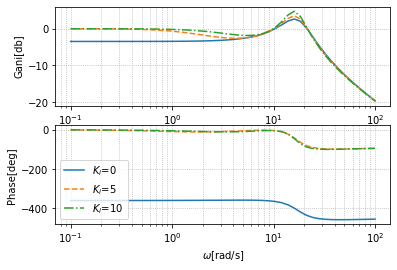

In [ ]:
LS=linestyle_generator()
fig,ax=plt.subplots(2,1)

for i in range(len(ki)):
  K=tf([kd,kp,ki[i]],[1,0])
  Gyr=feedback(P*K,1)
  gain,phase,w=bode(Gyr,logspace(-1,2),Plot=False)

  pltargs={'ls':next(LS),'label':'$K_i$='+str(ki[i])}
  ax[0].semilogx(w,20*np.log10(gain),**pltargs)
  ax[1].semilogx(w,phase*180/np.pi,**pltargs)

bodeplot_set(ax,'lower left')

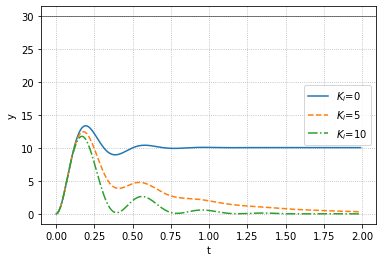

In [ ]:
kp=2
kd=0.1
ki=[0,5,10]

LS=linestyle_generator()
fig,ax=plt.subplots()

for i in range(len(ki)):
  K=tf([kd,kp,ki[i]],[1,0])
  Gyd=feedback(P,K)
  y,t=step(Gyd,np.arange(0,2,0.01))

  pltargs={'ls':next(LS),'label':'$K_i$='+str(ki[i])}
  ax.plot(t,y*ref,**pltargs)

ax.axhline(ref,color='k',linewidth=0.5)
plot_set(ax,'t','y','best')


/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)


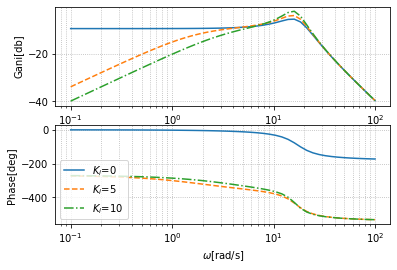

In [ ]:
LS=linestyle_generator()
fig,ax=plt.subplots(2,1)

for i in range(len(ki)):
  K=tf([kd,kp,ki[i]],[1,0])
  Gyd=feedback(P,K)
  gain,phase,w=bode(Gyd,logspace(-1,2),Plot=False)

  pltargs={'ls':next(LS),'label':'$K_i$='+str(ki[i])}
  ax[0].semilogx(w,20*np.log10(gain),**pltargs)
  ax[1].semilogx(w,phase*180/np.pi,**pltargs)

bodeplot_set(ax,'lower left')

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "
/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


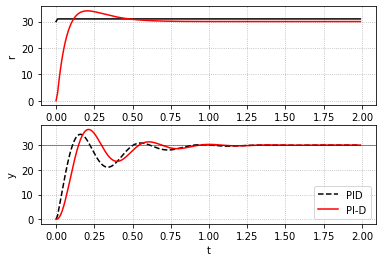

In [ ]:
kp=2
ki=10
kd=0.1

K1=tf([kd,kp,ki],[1,0])
K2=tf([kp,ki],[kd,kp,ki])

#transform function from z to y
Gyz=feedback(P*K1,1)

Td=np.arange(0,2,0.01)
r=1*(Td>0)

#目標値ｒをK2で整形
z,t,_=lsim(K2,r,Td,0)

fig,ax=plt.subplots(2,1)

#PID制御
y,_,_=lsim(Gyz,r,Td,0)
ax[0].plot(t,r+ref,color='k')
ax[1].plot(t,y*ref,ls='--',label='PID',color='k')

#PI-D制御
y,_,_=lsim(Gyz,z,Td,0)
ax[0].plot(t,z*ref,color='r')
ax[1].plot(t,y*ref,label='PI-D',color='r')

ax[1].axhline(ref,color='b',linewidth=0.5)
plot_set(ax[0],'t','r')
plot_set(ax[1],'t','y','best')

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "
/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


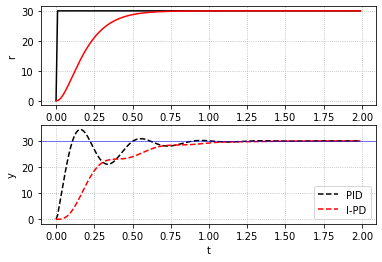

In [ ]:
fig,ax=plt.subplots(2,1)

#PID制御
y,_,_=lsim(Gyz,r,Td,0)
ax[0].plot(t,r*ref,color='k')
ax[1].plot(t,y*ref,ls='--',label='PID',color='k')

#I-PD制御
K3=tf([0,ki],[kd,kp,ki])
z,t,_=lsim(K3,r,Td,0)
y,_,_=lsim(Gyz,z,Td,0)

ax[0].plot(t,z*ref,color='r')
ax[1].plot(t,y*ref,ls='--',color='r',label='I-PD')

ax[1].axhline(ref,color='b',linewidth=0.5)
plot_set(ax[0],'t','r')
plot_set(ax[1],'t','y','best')

In [ ]:
num_delay,den_delay=pade(0.005,1) #パデ近似pade(無駄時間，次数)，返り値：分子，分母
Pdelay=P*tf(num_delay,den_delay)

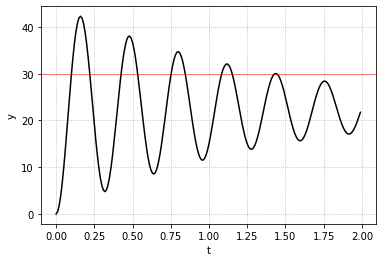

In [ ]:
fig,ax=plt.subplots()

kp0=2.9
K=tf([0,kp0],[0,1])
Gyr=feedback(P*K,1)
y,t=step(Gyr,np.arange(0,2,0.01))
ax.plot(t,y*ref,color='k')
ax.axhline(ref,color='r',linewidth=0.5)
plot_set(ax,'t','y')

Classic
$K_p$=1.74
$K_i$=11.6
$K_d$=0.06525
-------------------
No Overshoot
$K_p$=0.58
$K_i$=3.8666666666666667
$K_d$=0.05742
-------------------


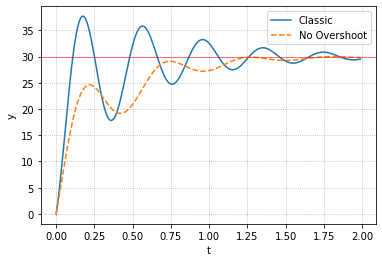

In [ ]:
kp=[0,0]
ki=[0,0]
kd=[0,0]
Rule=['','']

T0=0.3
kp0=2.9
#限界感度法
Rule[0]='Classic'
kp[0]=0.6*kp0
ki[0]=kp[0]/(0.5*T0)
kd[0]=kp[0]*(0.125*T0)

#No Overshoot(改良版)
Rule[1]='No Overshoot'
kp[1]=0.2*kp0
ki[1]=kp[1]/(0.5*T0)
kd[1]=kp[1]*(0.33*T0)

LS=linestyle_generator()
fig,ax=plt.subplots()

for i in range(2):
  K=tf([kd[i],kp[i],ki[i]],[1,0])
  Gyr=feedback(P*K,1)
  y,t=step(Gyr,np.arange(0,2,0.01))

  ax.plot(t,y*ref,ls=next(LS),label=Rule[i])

  print(Rule[i])
  print('$K_p$='+str(kp[i]))
  print('$K_i$='+str(ki[i]))
  print('$K_d$='+str(kd[i]))
  print('-------------------')

ax.axhline(ref,color='r',linewidth=0.5)
plot_set(ax,'t','y','best')

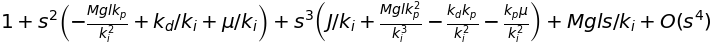

In [ ]:
import sympy as sp

s=sp.Symbol('s')
kp,kd,ki=sp.symbols('k_p k_d k_i')
Mgl,mu,J=sp.symbols('Mgl mu J') #変数が複数あるときには，Symbolsと複数形にする
sp.init_printing()

G=(kp*s+ki)/(J*s**3+(mu+kd)*s**2+(Mgl+kp)*s+ki)
sp.series(1/G,s,0,4)

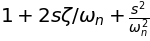

In [ ]:
sp.init_printing()
omega_n,zeta=sp.symbols('omega_n zeta')
M=omega_n**2/(s**2+2*zeta*omega_n*s+omega_n**2)
sp.series(1/M,s,0,4)

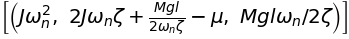

In [ ]:
f1=Mgl/ki-2*zeta/omega_n
f2=-Mgl*kp/ki**2+kd/ki+mu/ki-1/omega_n**2
f3=J/ki+Mgl*kp**2/ki**3-kd*kp/ki**2-kp*mu/ki**2
sp.solve([f1,f2,f3],[kp,kd,ki])#sp.solve([式=0],[解1 解2 解3])

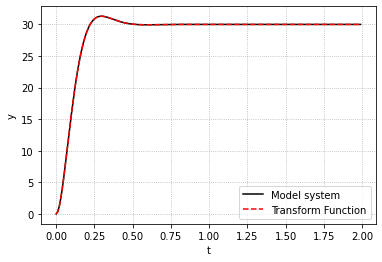

In [ ]:
import matplotlib.pyplot as plt
from control.matlab import *
import numpy as np

#規範モデル
omega_n=15
zeta=0.707
Msys=tf([0,omega_n**2],[1,2*zeta*omega_n,omega_n**2])

#モデルマッチング法によるゲインチューニング
#rからｙへの伝達関数Gyrを求め，1/Gyrのマクローリン展開と規範モデルMの1/Mのマクローリン展開を求め．低次の項から係数が一致するように係数ki,kd,kpを決定していく
kp=J*omega_n**2
kd=2*J*omega_n*zeta+M*g*l/(2*zeta*omega_n)-mu
ki=M*g*l*omega_n/(2*zeta)
Gyr=tf([kp,ki],[J,mu+kd,M*g*l+kp,ki])

yM,tM=step(Msys,np.arange(0,2,0.01))
y,t=step(Gyr,np.arange(0,2,0.01))

fig,ax=plt.subplots()
ax.plot(tM,yM*ref,ls='-',color='k',label='Model system')
ax.plot(t,y*ref,ls='--',color='r',label='Transform Function')
plot_set(ax,'t','y','best')

In [ ]:
sp.init_printing()
#I-PD制御の伝達関数
J=sp.Symbol('J')
mu=sp.Symbol('mu')
kp,ki,kd=sp.symbols('k_p k_i k_d')
s=sp.Symbol('s')
Gyr=ki/(J*s**3+(mu+kd)*s**2+(Mgl+kp)*s+ki)
sp.series(1/Gyr,s,0,4)

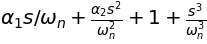

In [ ]:
omega_n,zeta=sp.symbols('omega_n zeta')
alpha1,alpha2=sp.symbols('alpha_1 alpha_2')
Msys=omega_n**3/(s**3+alpha2*omega_n*s**2+alpha1*omega_n**2*s+omega_n**3)
sp.series(1/Msys,s,0,4)

In [ ]:
sp.init_printing()
f1=Mgl/ki+kp/ki-alpha1/omega_n
f2=kd/ki+mu/ki-alpha2/omega_n**2
f3=J/ki-1/omega_n**3
sp.solve([f1,f2,f3],[kp,kd,ki])

In [ ]:
from control.matlab import *
A='0 1;-4 5'
B='0; 1'
C='1 0; 0 1'
D='0; 0'
P=ss(A,B,C,D)

Pole=[-1,-1]
F=-acker(P.A,P.B,Pole)

np.linalg.eigvals(P.A+P.B*F)

array([-1., -1.])

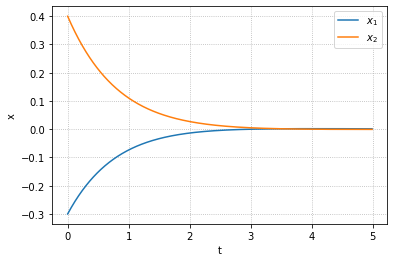

In [ ]:
Alc=P.A+P.B*F
Pfb=ss(Alc,P.B,P.C,P.D)

Td=np.arange(0,5,0.01)
X0=[-0.3,0.4]
x,t=initial(Pfb,Td,X0)

fig,ax=plt.subplots()
ax.plot(t,x[:,0],label='$x_1$')
ax.plot(t,x[:,1],label='$x_2$')

plot_set(ax,'t','x','best')

In [ ]:
Q=[[100,0],[0,1]]
R=1

#フィードバックゲインF,リッカチ方程式の解X，閉ループ系の極E
F,X,E=lqr(P.A,P.B,Q,R)
F=-F
#u=-F*xとなるようなFを求めているから，F=-Fとする
print('------フィードバックゲイン---------')
print(F)
print(-1/R*P.B.T*X) #T：転置，F(opt)=-1/R*B_T*Xで表現できる
print('--------閉ループ極---------------')
print(E)
print(np.linalg.eigvals(P.A+P.B*F))


------フィードバックゲイン---------
[[ -6.77032961 -11.28813639]]
[[ -6.77032961 -11.28813639]]
--------閉ループ極---------------
[-3.14406819+0.94083198j -3.14406819-0.94083198j]
[-3.14406819+0.94083198j -3.14406819-0.94083198j]


In [ ]:
#careをもちいた最適レギュレータによるフィードバックゲインの決定
X,E,F=care(P.A,P.B,Q,R)
F=-F
print('--------フィードバックゲイン----------')
print(F)
print('---------閉ループ極----------')
print(E)

--------フィードバックゲイン----------
[[ -6.77032961 -11.28813639]]
---------閉ループ極----------
[-3.14406819+0.94083198j -3.14406819-0.94083198j]


In [ ]:
#ハミルトン行列の安定固有値を求めることにより，極配置法からF(opt)を求める
H1=np.c_[P.A,-P.B*1/R*P.B.T]
H2=np.c_[Q,P.A.T]
H=np.r_[H1,-H2]
eigH=np.linalg.eigvals(H)

print('----------ハミルトン行列の安定固有値--------------')
print(eigH)
eigh_stable=[i for i in eigH if i<0]
print(eigh_stable)

print('----------ハミルトン行列の安定固有値からアッカーマンの極配置法によりフィードバックゲインを求める--------')
F=-acker(P.A,P.B,eigh_stable)
print(F)

----------ハミルトン行列の安定固有値--------------
[-3.14406819+0.94083198j -3.14406819-0.94083198j  3.14406819+0.94083198j
  3.14406819-0.94083198j]
[(-3.1440681937792814+0.9408319760374388j), (-3.1440681937792814-0.9408319760374388j)]
----------ハミルトン行列の安定固有値からアッカーマンの極配置法によりフィードバックゲインを求める--------
[[ -6.77032961 -11.28813639]]


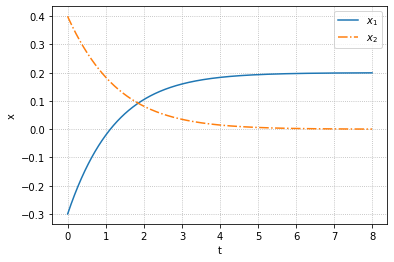

In [ ]:
Pole=[-1,-1]
F=-acker(P.A,P.B,Pole)
Acl=P.A+P.B*F
Pfb=ss(Acl,P.B,P.C,P.D)

Td=np.arange(0,8,0.01)
Ud=0.2*(Td>0)
x,t,_=lsim(Pfb,Ud,Td,[-0.3,0.4])

fig,ax=plt.subplots()
ax.plot(t,x[:,0],label='$x_1$')
ax.plot(t,x[:,1],label='$x_2$',ls='-.')

plot_set(ax,'t','x','best')
#これだと０に収束しない→積分型サーボ系，I-PD制御，出力yと目標値ｒの差を積分していき，それを入力に加える
#u=F*x+G*integral(r-y)dt

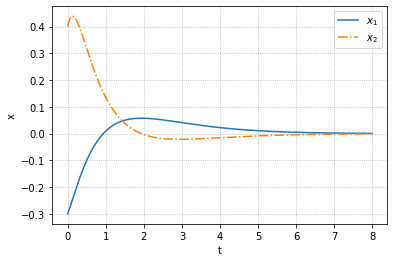

In [ ]:
#積分型サーボ系
A='0 1;-4 5'
B='0; 1'
C='1 0'
D='0'
P=ss(A,B,C,D)
#拡大系
Ae1=np.c_[P.A,np.zeros((2,1))]
Ae=np.r_[Ae1,-np.c_[P.C,0]]
Be=np.c_[P.B.T,0].T
Ce=np.c_[P.C,0]
#拡大系に対する状態フィードバック制御
Pole=[-1,-1,-5]
F=-acker(Ae,Be,Pole)
Acl=Ae+Be*F
Pfb=ss(Acl,Be,np.eye(3),np.zeros((3,1)))

Td=np.arange(0,8,0.01)
Ud=0.2*(Td>0)

x,t,_=lsim(Pfb,Ud,Td,[-0.3,0.4,0])

fig,ax=plt.subplots()
ax.plot(t,x[:,0],label='$x_1$')
ax.plot(t,x[:,1],ls='-.',label='$x_2$')
plot_set(ax,'t','x','best')

In [ ]:
#可制御行列 controlable (ctrb)
A='0 1;-4 5'
B='0; 1'
C='1 0'
D='0'
P=ss(A,B,C,D)

Uc=ctrb(P.A,P.B)
print('$U_c$=\n',Uc)
print('det($U_c$)=\n',np.linalg.det(Uc))
print('rank($U_c$)=\n',np.linalg.matrix_rank(Uc))

$U_c$=
 [[0. 1.]
 [1. 5.]]
det($U_c$)=
 -1.0
rank($U_c$)=
 2


In [ ]:
#可観測行列 observable(obsv)
Uo=obsv(A,C)
print('Uo=\n',Uo)
print('det(Uo)=\n',np.linalg.det(Uo))
print('rank(Uo)=\n',np.linalg.matrix_rank(Uo))


Uo=
 [[1. 0.]
 [0. 1.]]
det(Uo)=
 1.0
rank(Uo)=
 2
